In [32]:
# Importing lIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")
import sys
sys.path.append('/content/drive/My Drive/')
import utils
import plot_utils
import nse_utils
import standardization


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# File paths
plvo_file = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_USGS.txt")
plvo_file_sim = ("/content/drive/MyDrive/Datasets/raw/raw/PLVO2_sim.txt")


In [34]:
# Read and preprocess the USGS data
df_plvo = utils.read_usgs_data(plvo_file, header_line=32)

# Read and preprocess simulation data
df_plvo_sim = utils.read_simulation_data(plvo_file_sim, header_line=6)

In [35]:

# Merge df_plvo and df_plvo_sim
df_plvo_merge = pd.merge(df_plvo, df_plvo_sim, on='datetime', how='inner')



In [36]:
# Replace "CST" with "UTC" in the 'timezone' column

df_plvo_merge['timezone'] = df_plvo_merge['timezone'].replace('CST', 'UTC')

# Display the modified DataFrame
print(df_plvo_merge.head())

    org  site_num                  datetime timezone  USGS_Discharge quality  \
0  USGS   7328500 2007-01-01 06:00:00+00:00      UTC           355.0  A:[91]   
1  USGS   7328500 2007-01-01 12:00:00+00:00      UTC           351.0  A:[91]   
2  USGS   7328500 2007-01-01 18:00:00+00:00      UTC           329.0  A:[91]   
3  USGS   7328500 2007-01-02 00:00:00+00:00      UTC           317.0  A:[91]   
4  USGS   7328500 2007-01-02 06:00:00+00:00      UTC           310.0  A:[91]   

   Sim_Discharge  
0            504  
1            556  
2            561  
3            514  
4            450  


**Handling Missing Values**

In [37]:
# Check for missing values in df_plvo_merged
missing_values_plvo = df_plvo_merge.isnull().sum()

# Print the number of missing values for each station

print("\nNumber of missing values in df_plvo_merged:")
print(missing_values_plvo)



Number of missing values in df_plvo_merged:
org               0
site_num          0
datetime          0
timezone          0
USGS_Discharge    0
quality           0
Sim_Discharge     0
dtype: int64


**Filter Date Range**

In [38]:
# Convert 'datetime' column to datetime-like object
df_plvo_merge['datetime'] = pd.to_datetime(df_plvo_merge['datetime'])

# Filter the DataFrame for datetime values on "2007-01-01"
filtered_df = df_plvo_merge[df_plvo_merge['datetime'].dt.date == pd.to_datetime("2007-01-01")]

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [org, site_num, datetime, timezone, USGS_Discharge, quality, Sim_Discharge]
Index: []


**Timeseries Plot**

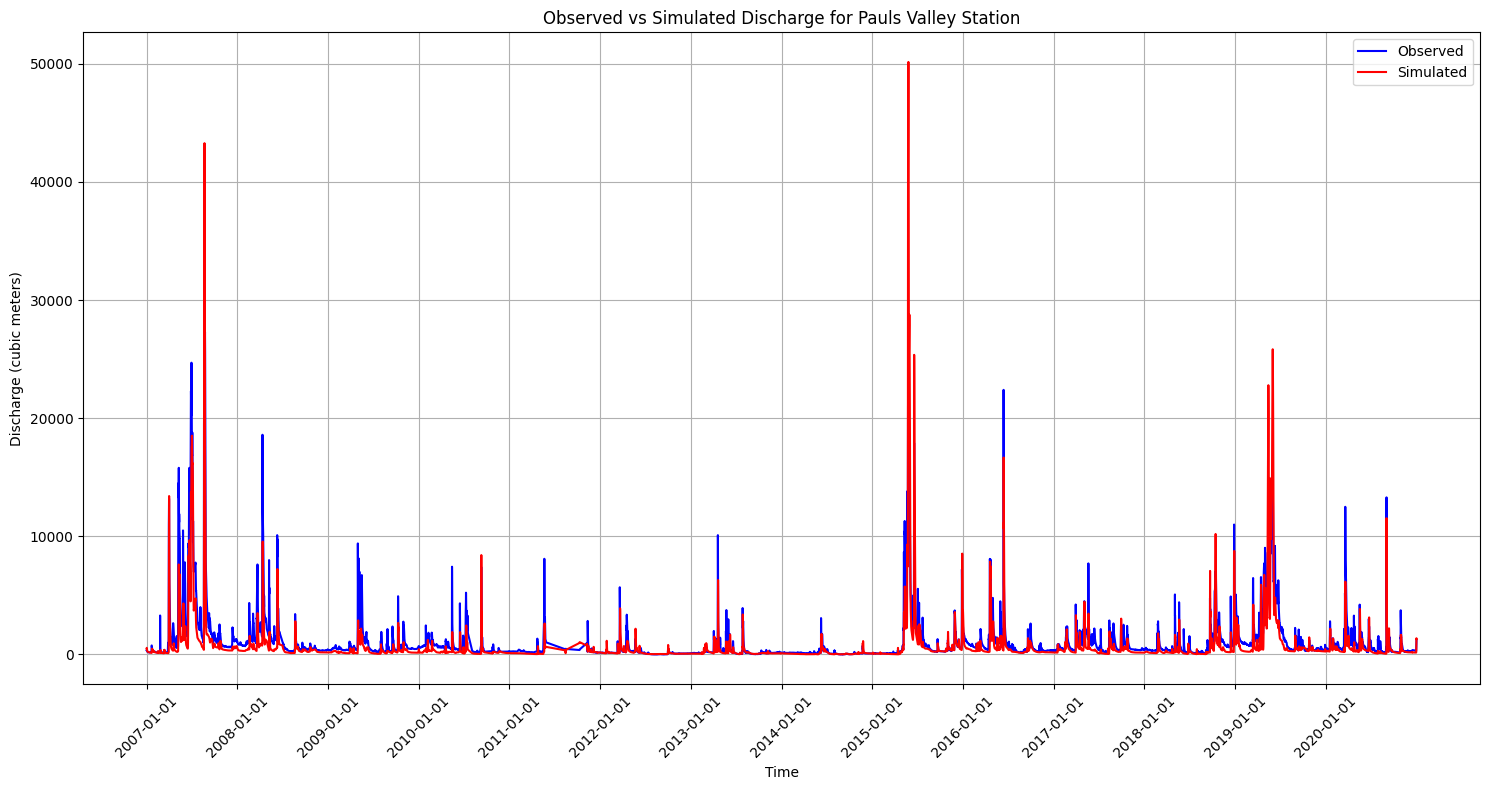

In [39]:
from plot_utils import plot_observed_vs_simulated_time_series

# Plot observed vs simulated discharge time series for Pauls Valley station
plot_observed_vs_simulated_time_series(df_plvo_merge, df_plvo_merge, 'Pauls Valley')


**BenchMarking the Existing Physics Based Model**

In [40]:

# Calculate NSE for Antlers station
nse_Pauls_Valley = nse_utils.calculate_nse_for_station(df_plvo_merge, df_plvo_merge)


print("NSE for Pauls Valley station:", nse_Pauls_Valley)



NSE for Pauls Valley station: 0.6116674437568762


**BenchMarking the Existing Physics Based Model**
Based on the Validation time period


---



In [41]:

# Define the start and end dates
start_date = '2016-01-01 00:00:00+00:00'
end_date = '2018-12-31 18:00:00+00:00'

# Create a new DataFrame within the specified timeframe
df_plvo_merge_Val = df_plvo_merge[(df_plvo_merge['datetime'] >= start_date) & (df_plvo_merge['datetime'] <= end_date)]

df_plvo_merge_Val


,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
10709,USGS,7328500,2016-01-01 00:00:00+00:00,UTC,2430.0,A,3710
10710,USGS,7328500,2016-01-01 06:00:00+00:00,UTC,2310.0,A,3764
10711,USGS,7328500,2016-01-01 12:00:00+00:00,UTC,2210.0,A,3697
10712,USGS,7328500,2016-01-01 18:00:00+00:00,UTC,2130.0,A,3539
10713,USGS,7328500,2016-01-02 00:00:00+00:00,UTC,2050.0,A,3333
...,...,...,...,...,...,...,...
14637,USGS,7328500,2018-12-30 18:00:00+00:00,UTC,4860.0,A,2183
14638,USGS,7328500,2018-12-31 00:00:00+00:00,UTC,4740.0,A,1995
14639,USGS,7328500,2018-12-31 06:00:00+00:00,UTC,4450.0,A,2033
14640,USGS,7328500,2018-12-31 12:00:00+00:00,UTC,4300.0,A,2317


In [42]:

# Calculate NSE for Antlers station
nse_Pauls_Valley = nse_utils.calculate_nse_for_station(df_plvo_merge_Val, df_plvo_merge_Val)


print("NSE for the validation period at Pauls Valley station:", nse_Pauls_Valley)



NSE for the validation period at Pauls Valley station: 0.59610091369163


In [43]:
df_plvo_merge


,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450
...,...,...,...,...,...,...,...
17402,USGS,7328500,2020-12-30 18:00:00+00:00,UTC,451.0,A:e,294
17403,USGS,7328500,2020-12-31 00:00:00+00:00,UTC,638.0,A:e,728
17404,USGS,7328500,2020-12-31 06:00:00+00:00,UTC,761.0,A:e,1175
17405,USGS,7328500,2020-12-31 12:00:00+00:00,UTC,959.0,A:e,1374


In [44]:
df_plvo_merge.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450


**Scaling - Standardization**

In [45]:
# Standardize the discharge columns
df_plvo_merge = standardization.standardize_discharge_columns(df_plvo_merge, ['Sim_Discharge', 'USGS_Discharge'])

# Display the updated DataFrame
df_plvo_merge.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge,Sim_Discharge_Standardized,USGS_Discharge_Standardized
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504,-0.085650,-0.324563
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556,-0.063496,-0.326430
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561,-0.061366,-0.336698
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514,-0.081390,-0.342299
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450,-0.108656,-0.345566


**Splitting the Data**

In [46]:
df_plvo_merge['datetime'] = pd.to_datetime(df_plvo_merge['datetime'])

In [47]:
train_start, train_end = '2007-01-01 06:00:00+00:00', '2015-12-31 18:00:00+00:00'
val_start, val_end = '2016-01-01 00:00:00+00:00', '2018-12-31 18:00:00+00:00'
test_start, test_end = '2019-01-01 00:00:00+00:00', '2020-12-31 12:00:00+00:00'


In [48]:
train_start = pd.Timestamp(train_start)
train_end = pd.Timestamp(train_end)
val_start = pd.Timestamp(val_start)
val_end = pd.Timestamp(val_end)
test_start = pd.Timestamp(test_start)
test_end = pd.Timestamp(test_end)


In [49]:
df_plvo_merge['datetime'] = pd.to_datetime(df_plvo_merge['datetime'])
df_plvo_train = df_plvo_merge[(df_plvo_merge['datetime'] >= train_start) & (df_plvo_merge['datetime'] <= train_end)]
df_plvo_val = df_plvo_merge[(df_plvo_merge['datetime'] >= val_start) & (df_plvo_merge['datetime'] <= val_end)]
df_plvo_test = df_plvo_merge[(df_plvo_merge['datetime'] >= test_start) & (df_plvo_merge['datetime'] <= test_end)]


In [50]:
df_plvo_train.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge,Sim_Discharge_Standardized,USGS_Discharge_Standardized
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504,-0.085650,-0.324563
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556,-0.063496,-0.326430
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561,-0.061366,-0.336698
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514,-0.081390,-0.342299
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450,-0.108656,-0.345566


In [51]:

# Verify lengths of each set
print("Training data length:", len(df_plvo_train))
print("Validation data length:", len(df_plvo_val))
print("Testing data length:", len(df_plvo_test))


Training data length: 10709
Validation data length: 3933
Testing data length: 2764


In [52]:
df_plvo_train.head()

,org,site_num,datetime,timezone,USGS_Discharge,quality,Sim_Discharge,Sim_Discharge_Standardized,USGS_Discharge_Standardized
0,USGS,7328500,2007-01-01 06:00:00+00:00,UTC,355.0,A:[91],504,-0.085650,-0.324563
1,USGS,7328500,2007-01-01 12:00:00+00:00,UTC,351.0,A:[91],556,-0.063496,-0.326430
2,USGS,7328500,2007-01-01 18:00:00+00:00,UTC,329.0,A:[91],561,-0.061366,-0.336698
3,USGS,7328500,2007-01-02 00:00:00+00:00,UTC,317.0,A:[91],514,-0.081390,-0.342299
4,USGS,7328500,2007-01-02 06:00:00+00:00,UTC,310.0,A:[91],450,-0.108656,-0.345566


In [53]:
df_plvo_merge.shape

(17407, 9)

In [54]:
# Drop columns except 'Sim_Discharge_Standardized' and 'USGS_Discharge'
df_plvo_merged = df_plvo_merge[['Sim_Discharge_Standardized', 'USGS_Discharge_Standardized']]

# Display the first few rows of the modified DataFrame
df_plvo_merged.head()


,Sim_Discharge_Standardized,USGS_Discharge_Standardized
0,-0.085650,-0.324563
1,-0.063496,-0.326430
2,-0.061366,-0.336698
3,-0.081390,-0.342299
4,-0.108656,-0.345566


**Feature Engineering**

In [55]:
# Define a function to prepare the dataset for LSTM
def prepare_dataset(X_data, y_data, n_steps):
    df_as_np = X_data.to_numpy()
    df2_as_np = y_data.to_numpy()
    X, y = [], []
    for i in range(len(X_data) - n_steps):
        row = [[a] for a in df_as_np[i:i+n_steps]]
        X.append(row)
        label = df2_as_np[i+n_steps]
        y.append(label)
    return np.array(X), np.array(y)
n_steps = 60

In [56]:
# Preparing the dataset for training
X_train, y_train = prepare_dataset(df_plvo_train['Sim_Discharge_Standardized'], df_plvo_train['USGS_Discharge_Standardized'], n_steps)

# Preparing the dataset for validation
X_val, y_val = prepare_dataset(df_plvo_val['Sim_Discharge_Standardized'], df_plvo_val['USGS_Discharge_Standardized'], n_steps)

# Preparing the dataset for testing
X_test, y_test = prepare_dataset(df_plvo_test['Sim_Discharge_Standardized'], df_plvo_test['USGS_Discharge_Standardized'], n_steps)


In [57]:
X_train.shape, y_train.shape,X_val.shape, y_val.shape,X_test.shape, y_test.shape

((10649, 60, 1), (10649,), (3873, 60, 1), (3873,), (2704, 60, 1), (2704,))

In [58]:
print(X_train.shape)

(10649, 60, 1)


**Long Short Term Memory**

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer(input_shape=(60, 1)))
model1.add(LSTM(16, activation='relu', return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model1.add(Dropout(0.35))
model1.add(LSTM(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model1.add(Dropout(0.4))
model1.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)))
model1.add(Dropout(0.35))
model1.add(Dense(1, activation='linear'))

model1.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 16)            1152      
                                                                 
 dropout_3 (Dropout)         (None, 60, 16)            0         
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [60]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [61]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [62]:
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, callbacks=[early_stopping])

Epoch 1/50
666/666 [==============================] - 35s 48ms/step - loss: 4.1095 - root_mean_squared_error: 2.0265 - val_loss: 0.2299 - val_root_mean_squared_error: 0.4767
Epoch 2/50
666/666 [==============================] - 31s 47ms/step - loss: 117.7361 - root_mean_squared_error: 10.8505 - val_loss: 0.2284 - val_root_mean_squared_error: 0.4749
Epoch 3/50
666/666 [==============================] - 31s 47ms/step - loss: 0.9258 - root_mean_squared_error: 0.9606 - val_loss: 0.2086 - val_root_mean_squared_error: 0.4533
Epoch 4/50
666/666 [==============================] - 33s 50ms/step - loss: 0.8871 - root_mean_squared_error: 0.9402 - val_loss: 0.1921 - val_root_mean_squared_error: 0.4347
Epoch 5/50
666/666 [==============================] - 33s 49ms/step - loss: 0.8315 - root_mean_squared_error: 0.9100 - val_loss: 0.1870 - val_root_mean_squared_error: 0.4285
Epoch 6/50
666/666 [==============================] - 31s 46ms/step - loss: 0.7612 - root_mean_squared_error: 0.8705 - val_loss

**Performance**

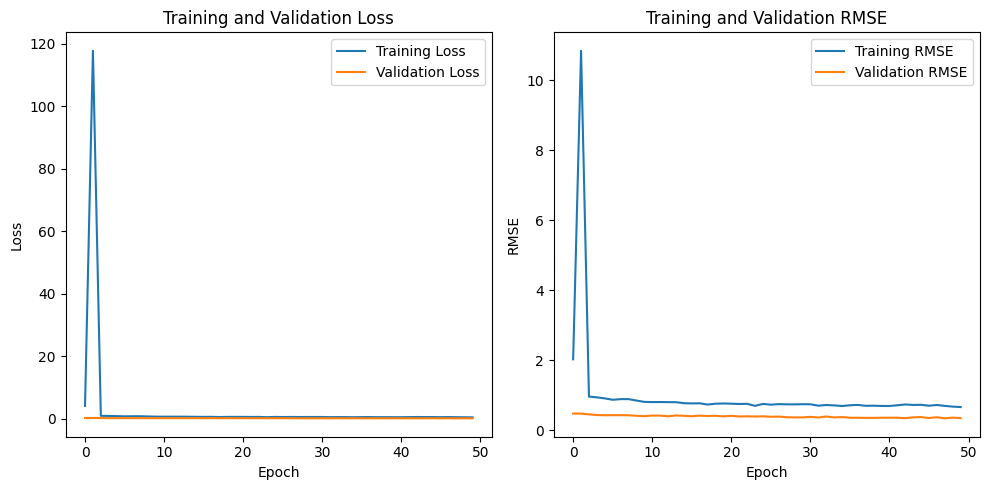

In [63]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


In [64]:
X_val.shape

(3873, 60, 1)

In [65]:
y_val.shape

(3873,)

In [66]:
# Since the X_val and y_val are the validation data
predictions = model1.predict(X_val)

#Create a DataFrame with predictions and actual values
df_result = pd.DataFrame({'Predictions': predictions.flatten(), 'Actual': y_val.flatten()})

# Print or use the DataFrame as needed
print(df_result)




122/122 [==============================] - 2s 12ms/step
      Predictions    Actual
0        0.005184 -0.060395
1       -0.003162 -0.070663
2       -0.011022 -0.070663
3       -0.015796 -0.072997
4       -0.017692 -0.072997
...           ...       ...
3868     0.931877  1.778050
3869     0.814928  1.722042
3870     0.729995  1.586691
3871     0.711230  1.516681
3872     0.816146  1.647365

[3873 rows x 2 columns]


**Calculating the NSE For LSTM**

In [67]:
y_mean = np.mean(y_val)  # Calculate the mean of actual target values

# Calculate the sum of squares of residuals
residuals = y_val - predictions.flatten()
SS_residuals = np.sum(residuals ** 2)

# Calculate the sum of squares of total
SS_total = np.sum((y_val - y_mean) ** 2)

# Calculate NSE
NSE = 1 - (SS_residuals / SS_total)

print("NSE value:", NSE)

NSE value: 0.5974064260121841


In [68]:
from sklearn.metrics import mean_squared_error

# Assuming y_test is your true target values
mse = mean_squared_error(y_val, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1193387348944717


**Bi-directional LSTM**